<a href="https://colab.research.google.com/github/Tjandak/Jandak/blob/main/Funkce_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Funkce - [pyladies](https://naucse.python.cz/2020/pyladies-hradec-leden/beginners/def/)

*args a **kwargs v Pythonu umožňují funkci přijímat libovolný počet pozičních a klíčových argumentů. *args shromažďuje všechny nepojmenované (poziční) argumenty do n-tice (tuple), zatímco **kwargs sbírá pojmenované (klíčové) argumenty do slovníku. To umožňuje větší flexibilitu při definování a volání funkcí, které nepotřebují mít předem daný počet argumentů.

### *args (poziční argumenty)

Zachytí libovolný počet pozičních argumentů, které nejsou explicitně definovány v seznamu parametrů funkce.
Předá tyto argumenty jako n-tici (tuple), na kterou lze přistupovat pomocí indexů.

### **kwargs (klíčové argumenty)
Zachytí všechny nepředané klíčové argumenty do slovníku, kde klíče jsou názvy argumentů a hodnoty jsou jejich přiřazené hodnoty.

Využití - flexibilní funkce s volitelným množstvím parametrů, [dekorátory funkce](https://www.itnetwork.cz/python/oop/dekoratory-v-pythonu).

S pomocí generativního AI chatbotu ([Claude](https://claude.ai/new)), [GitHub Copilot](https://github.com/copilot), ChatGPT, [Gemini](https://gemini.google.com/app) ) vylepši.

In [ ]:
# Průměr libovolného počtu čísel
def prumer(*cisla):
    ''' Vrátí průměr zadaných čísel.'''
    if len(cisla) == 0:
        return None
    print(type(cisla))  # Vytiskne typ proměnné cisla (tuple)
    print(cisla[-2:]) # Vytiskne poslední dvě čísla
    return sum(cisla) / len(cisla)

#print(prumer(1, 2, 3, 4))  # 2.5
print(prumer())

None


**Vylepšení**

In [ ]:
def prumer(*cisla):
    if not cisla:
        return None
    if not all(isinstance(x, (int, float)) for x in cisla):
        raise ValueError("Všechny argumenty musí být čísla.")
    if len(cisla) >= 2:
        print("Poslední dvě čísla:", cisla[-2:])
    return sum(cisla) / len(cisla)

print(prumer(1, 2, 3, 4))
print(prumer())

Poslední dvě čísla: (3, 4)
2.5
None


Vyzkoušejte různé typy volání funkce

In [ ]:
def vypis(text, *text2, opakovani=1):
    for _ in range(opakovani):
        print(text, end = ", ")
        print(text2)



**Typ 2**

In [ ]:
def vypis(text, *text2, opakovani=1):
    for _ in range(opakovani):
        print(text, end=", ")
        print(text2)

vypis("A")
vypis("A", "B", "C", "D")
vypis("Hello", "World", opakovani=3)
vypis("Start", 1, 2, 3)
vypis("X", "Y", "Z", opakovani=2)

A, ()
A, ('B', 'C', 'D')
Hello, ('World',)
Hello, ('World',)
Hello, ('World',)
Start, (1, 2, 3)
X, ('Y', 'Z')
X, ('Y', 'Z')


Vysvětli kód

In [ ]:
def vypis(text:str, *text2:str, opakovani=1):
    '''
    Vypíše
    '''
    for _ in range(opakovani):
        print(text, end = ", ")
        index = _%len(text2)
        print(text2[index])  # vypíše položku texty2


**Vysvětlení**

In [ ]:
def vypis(text: str, *text2: str, opakovani=1):
    if not text2:
        for _ in range(opakovani):
            print(text)
        return
    for _ in range(opakovani):
        print(text, end=", ")
        index = _ % len(text2)
        print(text2[index])

vypis("A")
vypis("A", "B", "C", "D")
vypis("Hello", "World", opakovani=3)
vypis("Start", "X", "Y", "Z", opakovani=5)

A
A, B
Hello, World
Hello, World
Hello, World
Start, X
Start, Y
Start, Z
Start, X
Start, Y


In [ ]:
def vypis_info(**kwargs):
  for klic, hodnota in kwargs.items():
    print(f"{klic}: {hodnota}")

vypis_info(jmeno="Petr", vek=30, mesto="Praha")

jmeno: Petr
vek: 30
mesto: Praha


Pořadí musí být:
poziční → *args → pojmenované → **kwargs

In [ ]:
def priklad(poziční, *args, pojmenovane=1, **kwargs):
    print("Poziční:", poziční)
    print("*args:", args)
    print("Pojmenované:", pojmenovane)
    print("**kwargs:", kwargs)

# Příklad volání
priklad(10, 20, 30, pojmenovane=5, extra1="A", extra2="B")

Poziční: 10
*args: (20, 30)
Pojmenované: 5
**kwargs: {'extra1': 'A', 'extra2': 'B'}


Vykoušejte různé způsoby volání funkcí

In [ ]:
def mix(a, b, *args, c=0, **kwargs):
    print("a =", a)
    print("b =", b)
    print("args =", args)
    print("c =", c)
    print("kwargs =", kwargs)

mix(1, 2, 3, 4, 5, c=10, x=100, y=200)

a = 1
b = 2
args = (3, 4, 5)
c = 10
kwargs = {'x': 100, 'y': 200}


**Typ 2**

In [ ]:
def mix(a, b, *args, c=0, **kwargs):
    print("a =", a)
    print("b =", b)
    print("args =", args)
    print("c =", c)
    print("kwargs =", kwargs)

mix(1, 2)
mix(1, 2, 3, 4, 5)
mix(1, 2, 3, 4, c=10)
mix(1, 2, c=5, x=100, y=200)
mix(1, 2, 3, 4, 5, c=10, x=100, y=200)

a = 1
b = 2
args = ()
c = 0
kwargs = {}
a = 1
b = 2
args = (3, 4, 5)
c = 0
kwargs = {}
a = 1
b = 2
args = (3, 4)
c = 10
kwargs = {}
a = 1
b = 2
args = ()
c = 5
kwargs = {'x': 100, 'y': 200}
a = 1
b = 2
args = (3, 4, 5)
c = 10
kwargs = {'x': 100, 'y': 200}


### Chybová hlášení
Ošetřete dělení nulou nějakým jiným způsobem.

In [26]:
def deleni(a: float, b: float):
    if b == 0:
        return None
    return a / b

print(deleni(10, 0))

None


**Oprava**

In [13]:
def deleni(a: float, b: float):
    if b == 0:
        return None
    return a / b

print(deleni(10, 0))

None


Typové hinty, isinstance
Když Python narazí na raise, okamžitě zastaví program a ukáže chybovou hlášku.

Nejčastější chybové hlášky:
raise TypeError("Očekávám číslo, ale dostal jsem text.")
raise ValueError("Číslo musí být kladné.")
raise IndexError("Index je mimo rozsah seznamu.")
raise RuntimeError("Došlo k neočekávané chybě.")

In [14]:
def obsah(a: int, b: int) -> float:
    return a*b
S = obsah(2,"3")
print(S)

33


In [18]:
def obsah(a: int, b: int) -> int:
    try:
        a = int(a)
        b = int(b)
    except (TypeError, ValueError):
        raise TypeError("Argumenty 'a' a 'b' musí být převeditelné na int.")

    return a * b

S = obsah(2, "3")
print(S)

6


### Generování náhodných čísel

In [19]:
import random

print(random.randint(1, 10))     # celé číslo 1–10
print(random.random())           # číslo 0–1
print(random.uniform(5, 15))     # desetinné číslo 5–15

1
0.6009824717305862
7.154249463504799


Vylepšete funkci  nahodny_prumer (docstring, typové hinty, *args, klíčové parametry)

In [20]:
def nahodny_prumer(n):
    cisla = [random.randint(1, 100) for _ in range(n)]
    return sum(cisla) / n

print(nahodny_prumer(5))

60.6


**Vylepšení**

In [23]:
import random
from typing import Union

def nahodny_prumer(
    n: int,
    *args: Union[int, float],
    minimum: int = 1,
    maximum: int = 100
) -> float:
    """
    Vygeneruje n náhodných čísel v daném rozsahu a vrátí jejich průměr.
    """
    if not isinstance(n, int):
        raise TypeError("n musí být int.")
    if n <= 0:
        raise ValueError("n musí být kladné číslo.")
    if not isinstance(minimum, int) or not isinstance(maximum, int):
        raise TypeError("minimum a maximum musí být int.")
    if minimum > maximum:
        raise ValueError("minimum nesmí být větší než maximum.")

    for value in args:
        if not isinstance(value, (int, float)):
            raise TypeError("Všechny *args musí být čísla.")

    cisla = [random.randint(minimum, maximum) for _ in range(n)]
    vsechna = cisla + list(args)
    return sum(vsechna) / len(vsechna)

print(nahodny_prumer(5))

64.8


Vygenerujte náhodná čísla a zobrazte jejich histogram = sloupcový graf, který ukazuje, kolikrát se něco vyskytuje.

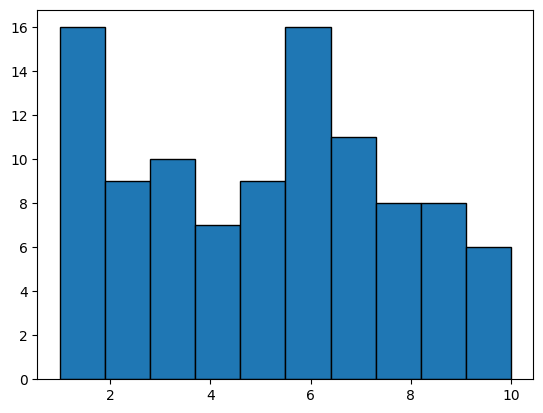

In [24]:
import random
import matplotlib.pyplot as plt

cisla = [random.randint(1, 10) for _ in range(100)]

plt.hist(cisla, bins=10, edgecolor='black')
plt.show()

